In [1]:
import numpy as np
import pandas as pd
import random as rnd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

C:\Users\Pushkar\Anaconda3\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
df_cluster = pd.read_csv('C:\\Users\\Pushkar\\OneDrive - The University of Kansas\\Test_DS_col\\mergedData.csv')

In [3]:
# divided the TempGlobal i.e. the continuous data into 3 bins and created a new column i.e. TempGlobal_bins
df_cluster_disct = df_cluster.copy(deep=True)
df_cluster_disct['TempGlobal_bins']=pd.cut(df_cluster_disct['TempGlobal'], 3,labels=["Low", "Medium", "High"])

In [4]:
df_cluster_disct.head(5)

,year,SeaLevel,Coal,Oil,Gas,CO2-Concentration,TempGlobal,TempLand,TempGlobal_bins
0,1900,-130.1,5727.78236,180.5557,63.88894,1880.29881,15.143917,8.501583,Low
1,1901,-130.5,5727.78236,180.5557,63.88894,1942.99709,15.073333,8.541917,Low
2,1902,-125.9,5727.78236,180.5557,63.88894,1996.90205,14.958333,8.304417,Low
3,1903,-117.9,5727.78236,180.5557,63.88894,2186.94199,14.836583,8.220167,Low
4,1904,-128.2,5727.78236,180.5557,63.88894,2202.66794,14.810417,8.090917,Low


In [5]:
#[(14.775, 15.204] = Low
# (15.204, 15.631] = Medium
# (15.631, 16.059]] = High

pd.cut(df_cluster_disct['TempGlobal'], 3).head()

0    (14.775, 15.204]
1    (14.775, 15.204]
2    (14.775, 15.204]
3    (14.775, 15.204]
4    (14.775, 15.204]
Name: TempGlobal, dtype: category
Categories (3, interval[float64]): [(14.775, 15.204] < (15.204, 15.631] < (15.631, 16.059]]

In [6]:
df_cluster_disct.drop(['year','TempGlobal','TempLand'],axis=1,inplace=True) #dropping the Id column as it is unecessary, axis=1 specifies that it should be column wise, inplace =1 means the changes should be reflected into the dataframe

In [7]:
df_cluster_disct.head()

,SeaLevel,Coal,Oil,Gas,CO2-Concentration,TempGlobal_bins
0,-130.1,5727.78236,180.5557,63.88894,1880.29881,Low
1,-130.5,5727.78236,180.5557,63.88894,1942.99709,Low
2,-125.9,5727.78236,180.5557,63.88894,1996.90205,Low
3,-117.9,5727.78236,180.5557,63.88894,2186.94199,Low
4,-128.2,5727.78236,180.5557,63.88894,2202.66794,Low


In [8]:
species_map={'Low':0,'Medium':1,'High':2}
df_cluster_disct['TempGlobal_bins']=df_cluster_disct['TempGlobal_bins'].replace(species_map)
df_cluster_disct.head()

,SeaLevel,Coal,Oil,Gas,CO2-Concentration,TempGlobal_bins
0,-130.1,5727.78236,180.5557,63.88894,1880.29881,0
1,-130.5,5727.78236,180.5557,63.88894,1942.99709,0
2,-125.9,5727.78236,180.5557,63.88894,1996.90205,0
3,-117.9,5727.78236,180.5557,63.88894,2186.94199,0
4,-128.2,5727.78236,180.5557,63.88894,2202.66794,0


In [9]:
train=df_cluster_disct.sample(frac=0.7,random_state=200)
test=df_cluster_disct.drop(train.index)

In [10]:
train=train.reset_index()
train=train[['SeaLevel', 'Coal', 'Oil', 'Gas','CO2-Concentration','TempGlobal_bins']]
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 6 columns):
SeaLevel             81 non-null float64
Coal                 81 non-null float64
Oil                  81 non-null float64
Gas                  81 non-null float64
CO2-Concentration    81 non-null float64
TempGlobal_bins      81 non-null int64
dtypes: float64(5), int64(1)
memory usage: 3.9 KB


In [11]:
test=test.reset_index()
test=test[['SeaLevel', 'Coal', 'Oil', 'Gas','CO2-Concentration','TempGlobal_bins']]
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
SeaLevel             35 non-null float64
Coal                 35 non-null float64
Oil                  35 non-null float64
Gas                  35 non-null float64
CO2-Concentration    35 non-null float64
TempGlobal_bins      35 non-null int64
dtypes: float64(5), int64(1)
memory usage: 1.7 KB


In [12]:
train.head()

,SeaLevel,Coal,Oil,Gas,CO2-Concentration,TempGlobal_bins
0,-125.9,5727.78236,180.55570,63.88894,1996.90205,0
1,-44.9,15441.67902,11097.23110,4472.22580,53909.31305,1
2,-102.1,10125.00810,1755.55696,602.77826,3323.12261,0
3,-121.2,8655.56248,397.22254,141.66678,3116.73649,0
4,-12.1,24434.12552,33894.40315,17388.78860,105840.12080,1


In [13]:
train.groupby(['TempGlobal_bins']).count()

,SeaLevel,Coal,Oil,Gas,CO2-Concentration
TempGlobal_bins,,,,,
0,28,28,28,28,28
1,41,41,41,41,41
2,12,12,12,12,12


In [14]:
#Data Analysis & Visualisation

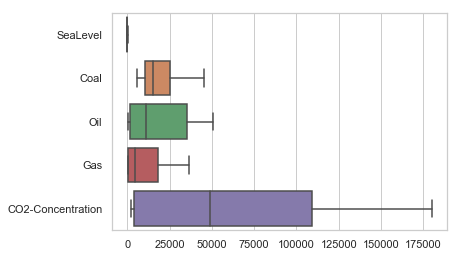

In [15]:
sns.set(style="whitegrid", color_codes=True)
np.random.seed(sum(map(ord, "categorical")))
sns.boxplot(data=train[['SeaLevel', 'Coal', 'Oil', 'Gas','CO2-Concentration']], orient="h");

In [16]:
# Various Models and Predictions

In [17]:
train.columns

Index(['SeaLevel', 'Coal', 'Oil', 'Gas', 'CO2-Concentration',
       'TempGlobal_bins'],
      dtype='object')

In [18]:
X_train=train[['SeaLevel', 'Coal', 'Oil', 'Gas', 'CO2-Concentration']]


Y_train=train['TempGlobal_bins']

X_test=test[['SeaLevel', 'Coal', 'Oil', 'Gas', 'CO2-Concentration']]


Y_test=test['TempGlobal_bins']

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((81, 5), (81,), (35, 5), (35,))

In [19]:
# Modelling

In [20]:
# 1. LOGISTIC REGRESSION

In [21]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_test,Y_test) * 100, 2)
acc_log

82.86

In [24]:
coeff_df = pd.DataFrame(X_train.columns)


# 2. SUPPORT VECTOR MACHINE

In [25]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_test,Y_test) * 100, 2)
acc_svc

40.0

In [26]:
# 3. KNN

In [27]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_test,Y_test) * 100, 2)
acc_knn

80.0

In [28]:
#4. NAIVE BAYES

In [29]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_test,Y_test) * 100, 2)
acc_gaussian

80.0

In [30]:
#5. PERCEPTRON

In [31]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_test,Y_test) * 100, 2)
acc_perceptron

C:\Users\Pushkar\Anaconda3\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


51.43

In [32]:
# 6. LINEAR SVC

In [35]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_test,Y_test) * 100, 2)
acc_linear_svc

57.14

In [34]:
# 7. SGD

In [36]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_test,Y_test) * 100, 2)
acc_sgd

C:\Users\Pushkar\Anaconda3\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


60.0

In [37]:
# 8. DECISION TREE

In [38]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_test,Y_test) * 100, 2)
acc_decision_tree

77.14

In [39]:
# 9. RANDOM FOREST

In [40]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_test,Y_test) * 100, 2)
acc_random_forest

77.14

In [41]:
## 4.3 Comparison of Models

In [42]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Test Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Test Score', ascending=False)

,Model,Test Score
2,Logistic Regression,82.86
1,KNN,80.00
4,Naive Bayes,80.00
3,Random Forest,77.14
8,Decision Tree,77.14
6,Stochastic Gradient Decent,60.00
7,Linear SVC,57.14
5,Perceptron,51.43
0,Support Vector Machines,40.00


C:\Users\Pushkar\Anaconda3\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Pushkar\Anaconda3\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


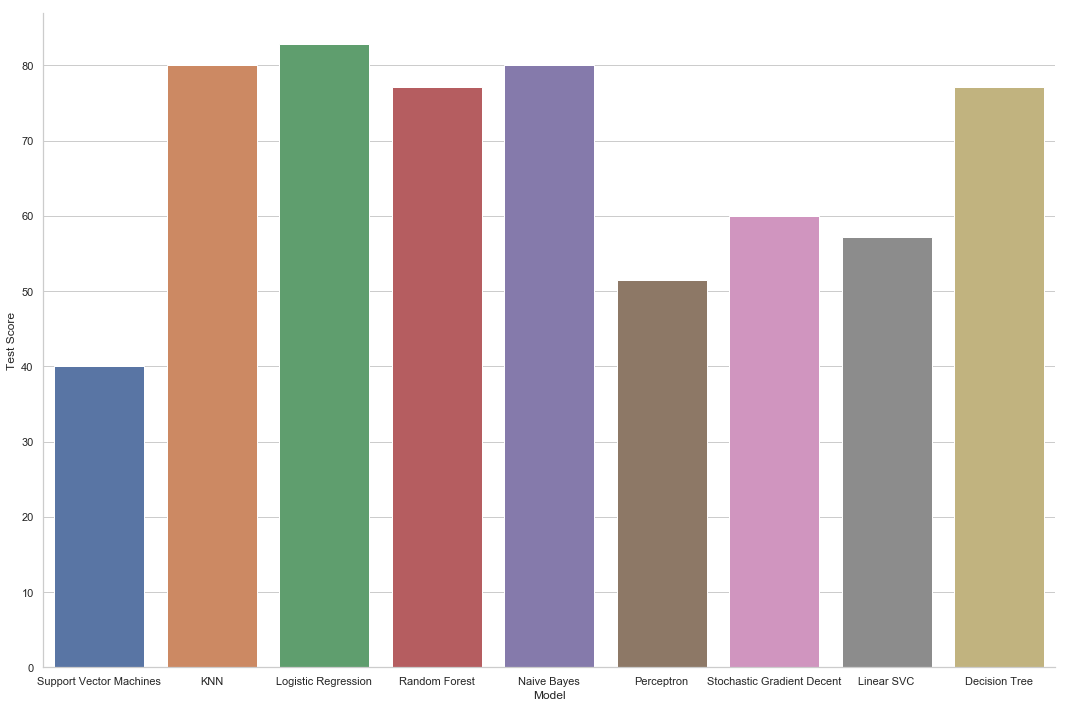

In [47]:
sns.factorplot(data=models,y='Test Score',x='Model',kind='bar',size=10,aspect=1.5)